<a href="https://colab.research.google.com/github/danimcav/Humanidades-Digitais/blob/main/Daniella_Monteiro_Cavalheiro_v_2_MHD_UMinho_Corpora_nas_Humanidades_Digitais_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seção 1: Introdução

Bem-vindo à disciplina "Corpora nas Humanidades Digitais" do Mestrado em Humanidades Digitais da Escola de Letras, Artes e Ciências Humanas da Universidade do Minho. Neste ambiente do Google Colab, você encontrará material de apoio relacionado a esta disciplina.

## Descrição do Dataset

O dataset utilizado neste ambiente é o Yelp dataset (https://www.yelp.com/dataset), que consiste em uma amostra dos dados de negócios, avaliações e usuários do Yelp. Esses dados estão disponíveis em formato JSON e são frequentemente utilizados para fins acadêmicos e de pesquisa. O Yelp dataset é valioso para ensinar conceitos relacionados a bancos de dados, aprendizado de processamento de linguagem natural (NLP) e para servir como dados de amostra durante o desenvolvimento de aplicativos móveis.


Os principais arquivos JSON do dataset são:

**business.json**
- `business_id`: Uma string única de 22 caracteres que representa o ID exclusivo do negócio.
- `name`: O nome do negócio.
- `address`: O endereço completo do negócio.
- `city`: A cidade onde o negócio está localizado.
- `state`: O código de estado, composto por 2 caracteres, se aplicável.
- `postal code`: O código postal da localização do negócio.
- `latitude`: A latitude da localização do negócio em formato float.
- `longitude`: A longitude da localização do negócio em formato float.
- `stars`: A classificação do negócio, arredondada para meia estrela.
- `review_count`: O número de avaliações do negócio.
- `is_open`: Um valor inteiro, 0 ou 1, que indica se o negócio está fechado ou aberto, respectivamente.
- `attributes`: Um objeto que contém atributos do negócio, onde alguns valores de atributo podem ser objetos aninhados.
- `categories`: Uma matriz de strings que representam as categorias do negócio.
- `hours`: Um objeto que mapeia os dias da semana para as horas de funcionamento em formato de relógio 24 horas.

**review.json**
- `review_id`: Uma string única de 22 caracteres que representa o ID exclusivo da avaliação.
- `user_id`: Uma string única de 22 caracteres que corresponde ao usuário no arquivo "user.json".
- `business_id`: Uma string única de 22 caracteres que corresponde ao negócio no arquivo "business.json".
- `stars`: Uma avaliação em formato inteiro.
- `date`: A data da avaliação em formato "YYYY-MM-DD".
- `text`: O texto completo da avaliação.
- `useful`: O número de votos "úteis" recebidos pela avaliação.
- `funny`: O número de votos "engraçados" recebidos pela avaliação.
- `cool`: O número de votos "legais" recebidos pela avaliação.

A seguir, exploraremos a carga e análise desse dataset para melhor compreender seu conteúdo e aplicar técnicas quantitativas e de pré-processamento de texto.


# Seção 2: Carregamento do Dataset

Nesta seção, abordaremos o carregamento do dataset Yelp no ambiente do Google Colab. É o primeiro passo para explorar e analisar os dados disponíveis.

Link para download: https://drive.google.com/drive/folders/1wXW9YUlCP7YMUUhF1iHCOljQ6ngsVooz



In [ ]:
# A seção de imports serve para carregar bibliotecas e módulos adicionais que serão usados
# no notebook, permitindo o acesso a funcionalidades específicas dessas bibliotecas durante a execução do código.

# Importe a biblioteca 'json'
import json

# Importe a biblioteca 'pandas' com o alias 'pd'
import pandas as pd

In [ ]:
# Função para carregar dados JSON em um DataFrame
def load_json_to_dataframe(file_name):
    data = []
    with open(file_name) as data_file:
        for line in data_file:
            try:
                json_obj = json.loads(line)
                data.append(json_obj)
            except json.JSONDecodeError:
                # Lida com problemas de formato JSON, se houver
                pass
    return pd.DataFrame(data)

# Nome do arquivo JSON para os dados de negócios
business_file = "yelp_academic_dataset_business.json"

# Nome do arquivo JSON para os dados de revisão
review_file = "subset_yelp_academic_dataset_review.json"

# Carrega os dados em DataFrames
business_df = load_json_to_dataframe(business_file)
review2_df = load_json_to_dataframe(review_file)

# Exibe as primeiras linhas dos DataFrames


## Visualização das Primeiras Linhas do DataFrame

 Para visualizar as primeiras linhas do DataFrame, você pode usar o comando dataframe.head().
 Por padrão, isso mostrará as primeiras cinco linhas. Por exemplo:

In [9]:
business_df.head()  # Para os dados de negócios


business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.955505  -75.155564    4.0            80        1   
4  40.338183  -75.471659    4.5            13        1   

                                          attributes  \
0                      {'ByAppointmentOnly': 'True'}   
1             {'BusinessAcceptsCreditCards': 'True'}   
2  {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4  {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   
2  Department Stores, Shopping, Fashion, Home & G...   
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                          Brewpubs, Breweries, Food   

                                               hours  
0                                               None  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...  
2  {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...  
3  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...  
4  {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...

In [10]:
review2_df.head()   # Para os dados de revisão

review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.   Our favo...  2015-01-04 00:01:03  
4  Cute interior and owner (?) gave us tour of up...  2017-01-14 20:54:15

## Informações Gerais sobre o DataFrame

 Para obter informações gerais sobre o DataFrame, como o número de linhas, colunas, tipos de dados e valores nulos,
 você pode usar o comando dataframe.info(). Por exemplo:
df.info()


In [11]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52999 entries, 0 to 52998
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52999 non-null  object 
 1   name          52999 non-null  object 
 2   address       52999 non-null  object 
 3   city          52999 non-null  object 
 4   state         52999 non-null  object 
 5   postal_code   52999 non-null  object 
 6   latitude      52999 non-null  float64
 7   longitude     52999 non-null  float64
 8   stars         52999 non-null  float64
 9   review_count  52999 non-null  int64  
 10  is_open       52999 non-null  int64  
 11  attributes    48276 non-null  object 
 12  categories    52961 non-null  object 
 13  hours         44816 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.7+ MB


## Tipos de Dados e Classificação

Os tipos de dados descrevem o tipo de valor que uma variável pode conter. Eles podem ser categorizados como numéricos (inteiros ou de ponto flutuante) e categóricos (strings, por exemplo). Compreender os tipos de dados é essencial para escolher as técnicas de análise corretas e realizar operações apropriadas.

In [12]:
# Tipos de dados das colunas
tipos_de_dados = business_df.dtypes
print(tipos_de_dados)


business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object


### Exercício 1 ⏰:
Use o ChatGPT para:
# Nueva sección

1.   Classificar os tipos de variáveis do dataset
2.   Interpretar os tipos de variáveis do dataset



*italicised text*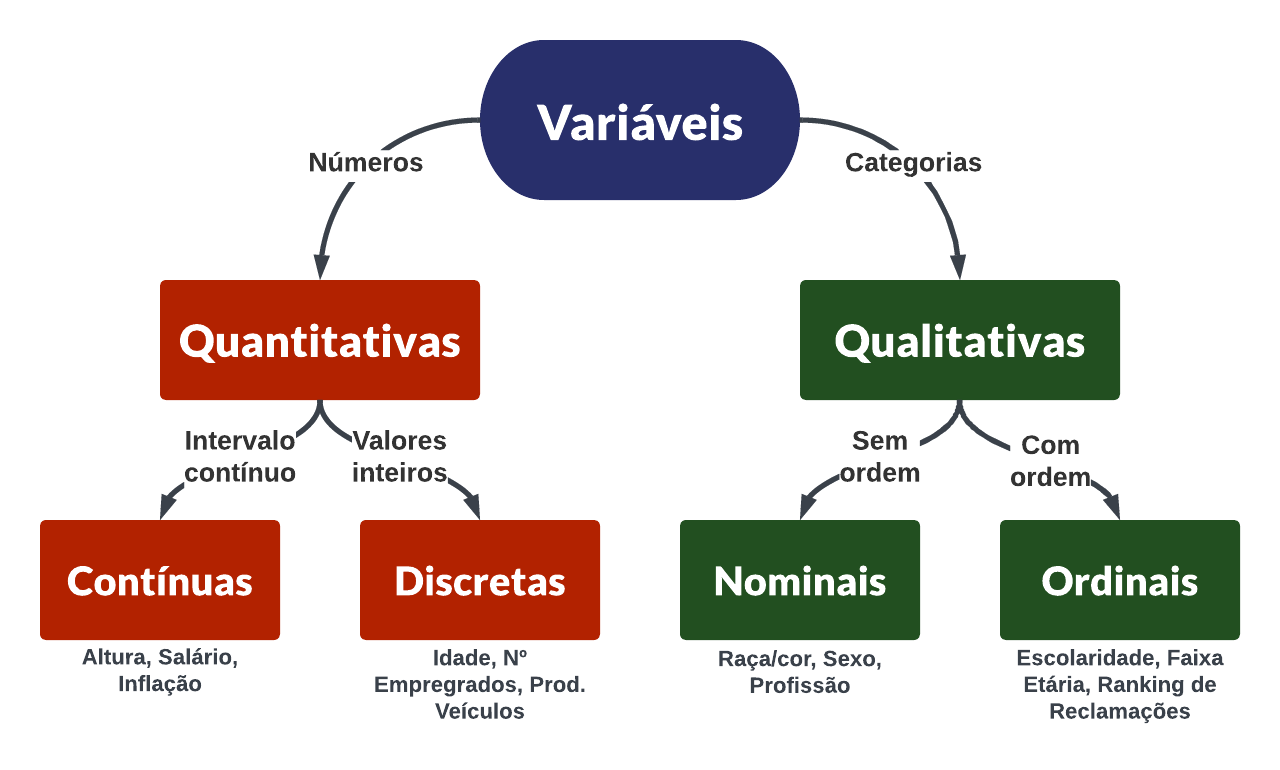

# Seção 3: Análise Quantitativa com Estatística Básica

Aqui, iremos realizar uma análise quantitativa dos dados do Yelp dataset utilizando estatística básica. Vamos explorar métricas e insights a partir dos dados disponíveis.



## Estatísticas Básicas

 Você pode calcular estatísticas básicas das colunas numéricas usando o comando dataframe.describe().
 Isso inclui média, desvio padrão, valor mínimo, percentis e valor máximo. Por exemplo:
df.describe()


In [13]:
business_df.describe()


latitude     longitude         stars  review_count       is_open
count  52999.000000  52999.000000  52999.000000  52999.000000  52999.000000
mean      36.668929    -89.352200      3.598823     45.468009      0.798185
std        5.885257     14.909798      0.973319    118.604358      0.401359
min       27.555127   -120.095137      1.000000      5.000000      0.000000
25%       32.186861    -90.354611      3.000000      8.000000      1.000000
50%       38.770895    -86.120701      3.500000     15.000000      1.000000
75%       39.954082    -75.417091      4.500000     38.000000      1.000000
max       53.648734    -74.658572      5.000000   5070.000000      1.000000

### Exercício 2 ⏰:
Use o ChatGPT para:


1. Definir cada um dos elementos de estatística da tabela
2. Descrever e interpretar cada um dos resultados

## Média
É a soma de todos os valores dividida pelo número de valores. Representa o valor médio.



In [14]:
# Média das avaliações (stars)
media = business_df['stars'].mean()
print(f'Média de avaliações: {media}')

Média de avaliações: 3.5988226192947037


### Exercício 3 ⏰:
Use o ChatGPT para:


1. Calcular a média de outra variável do dataset
2. Descrever e interpretar o resultado


In [15]:
media = business_df['review_count'].mean()
print(f'Média de avaliações: {media}')

Média de avaliações: 45.46800883035529


## Mediana
A mediana é o valor do meio quando todos os valores são ordenados. É uma medida de tendência central.

In [16]:
# Mediana das avaliações (stars)
mediana = business_df['stars'].median()
print(f'Mediana de avaliações: {mediana}')


Mediana de avaliações: 3.5


### Exercício 4 ⏰:
Use o ChatGPT para:


1. Calcular a mediana de outra variável do dataset
2. Descrever e interpretar o resultado

In [17]:

# Cálculo da mediana para a variável 'review_count'
mediana_review_count = business_df['review_count'].median()
print(f'Mediana do número de avaliações: {mediana_review_count}')


Mediana do número de avaliações: 15.0


## Moda
A moda é o valor que mais se repete no conjunto de dados. Pode haver várias modas ou nenhuma.

In [18]:
# Moda das categorias (categories)
moda = business_df['categories'].mode()
print(f'Moda dos categorias: {moda[0]}')

Moda dos categorias: Beauty & Spas, Nail Salons


### Exercício 5 ⏰:
Use o ChatGPT para:


1. Calcular a moda de outra variável do dataset
2. Descrever e interpretar o resultado

In [19]:
# Cálculo da moda para a variável 'stars'
moda_stars = business_df['stars'].mode()
print(f'Moda das classificações (stars): {moda_stars[0]}')


Moda das classificações (stars): 4.0


## Distribuição de Frequência
A distribuição de frequência é uma tabela que mostra a frequência (número de vezes) com que cada valor ocorre em um conjunto de dados. Isso ajuda a visualizar a distribuição dos dados. A distribuição de frequência ajuda a identificar padrões, tendências e valores atípicos nos dados.


In [20]:
# Distribuição de frequência das avaliações (stars)
distribuicao_frequencia = business_df['stars'].value_counts()
print(distribuicao_frequencia)

4.0    11127
4.5     9555
3.5     9332
3.0     6489
5.0     5733
2.5     4953
2.0     3381
1.5     1722
1.0      707
Name: stars, dtype: int64


### Exercício 6 ⏰:
Use o ChatGPT para:


1. Criar um gráfico para visualizar a distribuição de frequência da variável "stars"
2. Interpretar o resultado

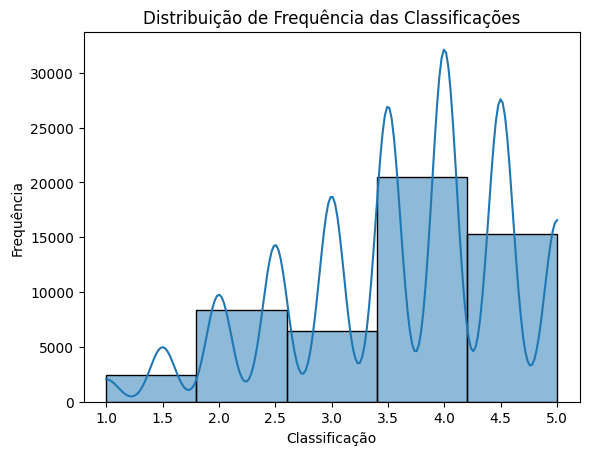

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Criando um histograma com Seaborn
sns.histplot(data=business_df, x='stars', bins=5, kde=True)
plt.xlabel('Classificação')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequência das Classificações')
plt.show()


## Variância e Desvio Padrão
 A variância mede o quão espalhados estão os valores em relação à média. O desvio padrão é a raiz quadrada da variância e indica o quanto os valores variam em relação à média. A variância e o desvio padrão são medidas de dispersão que ajudam a entender a amplitude dos dados.

In [22]:
# Variância e Desvio Padrão das avaliações (stars)
variancia = business_df['stars'].var()
desvio_padrao = business_df['stars'].std()
print(f'Variância das avaliações: {variancia}')
print(f'Desvio Padrão das avaliações: {desvio_padrao}')


Variância das avaliações: 0.9473502119220346
Desvio Padrão das avaliações: 0.9733191726879907


### Exercício 7 ⏰:
Use o ChatGPT para:


1. Calcular a variância e desvio padrão de outra variável do dataset
2. Descrever e interpretar o resultado

In [23]:
variancia = business_df['review_count'].var()
desvio_padrao = business_df['review_count'].std()
print(f'Variância das avaliações: {variancia}')
print(f'Desvio Padrão das avaliações: {desvio_padrao}')


Variância das avaliações: 14066.99383955945
Desvio Padrão das avaliações: 118.60435843407885


##Percentis

Os percentis são medidas estatísticas que dividem um conjunto de dados ordenados em partes iguais. Por exemplo, o 25º percentil é o valor abaixo do qual 25% dos dados estão. Isso ajuda a entender a distribuição dos dados e a identificar valores atípicos.
Os percentis são úteis para avaliar onde um valor específico se encaixa na distribuição dos dados. Eles são comumente usados para entender a dispersão de dados, identificar valores atípicos e fazer comparações.

25º Percentil das avaliações: 3.0


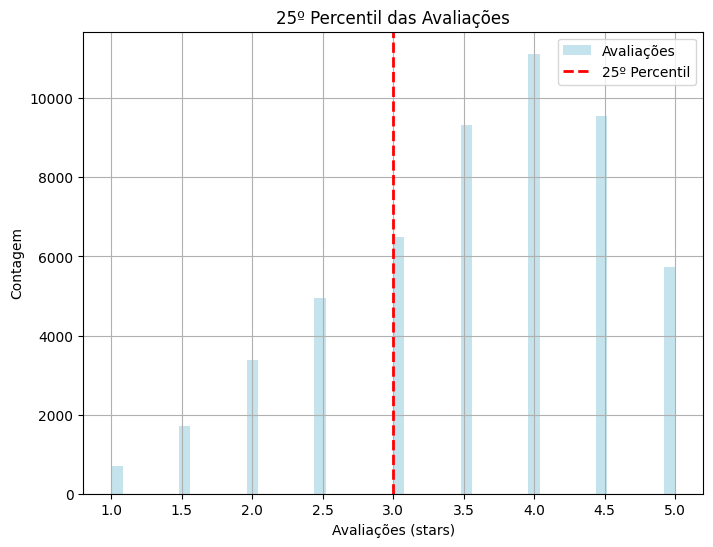

In [24]:
import matplotlib.pyplot as plt

# Cálculo do 25º percentil das avaliações (stars)
percentil_25 = business_df['stars'].quantile(0.25)
print(f'25º Percentil das avaliações: {percentil_25}')

# Criar um gráfico para visualizar o percentil
plt.figure(figsize=(8, 6))
plt.hist(business_df['stars'], bins=50, color='lightblue', alpha=0.7, label='Avaliações')
plt.axvline(percentil_25, color='red', linestyle='dashed', linewidth=2, label='25º Percentil')
plt.xlabel('Avaliações (stars)')
plt.ylabel('Contagem')
plt.legend()
plt.title('25º Percentil das Avaliações')
plt.grid(True)
plt.show()


### Exercício 8 ⏰:
Use o ChatGPT para:

1. Calcular 25º percentil de outra variável do dataset
2. Descrever e interpretar o resultado

25º Percentil das avaliações: 8.0


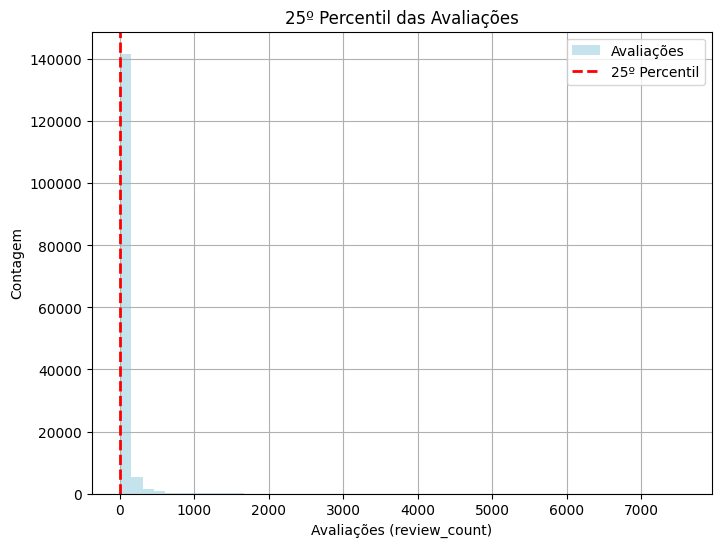

In [ ]:
# Carregar o dataset
df = pd.read_json('/content/yelp_academic_dataset_business.json', lines=True)

# Cálculo do 25º percentil das avaliações (review_count)
percentil_25 = df['review_count'].quantile(0.25)
print(f'25º Percentil das avaliações: {percentil_25}')

# Criar um gráfico para visualizar o percentil
plt.figure(figsize=(8, 6))
plt.hist(df['review_count'], bins=50, color='lightblue', alpha=0.7, label='Avaliações')
plt.axvline(percentil_25, color='red', linestyle='dashed', linewidth=2, label='25º Percentil')
plt.xlabel('Avaliações (review_count)')
plt.ylabel('Contagem')
plt.legend()
plt.title('25º Percentil das Avaliações')
plt.grid(True)
plt.show()

## Box Plots
Box plots (gráficos de caixa e bigodes) são uma representação visual da distribuição dos dados. Eles mostram os quartis, possíveis valores atípicos e a mediana dos dados. Box plots são úteis para identificar a presença de valores atípicos, avaliar a simetria e dispersão dos dados, e comparar distribuições entre diferentes grupos.

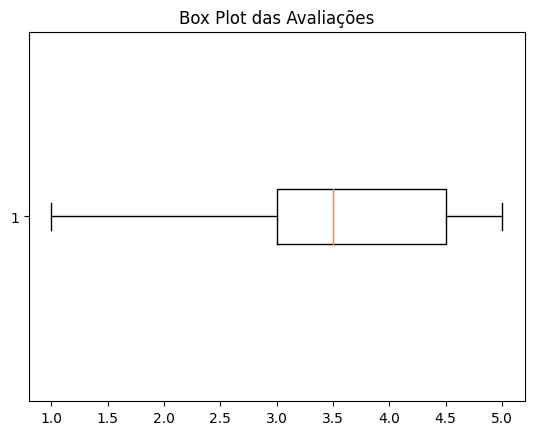

In [ ]:
# Criação de um box plot para as avaliações (stars)
import matplotlib.pyplot as plt
plt.boxplot(business_df['stars'], vert=False)
plt.title('Box Plot das Avaliações')
plt.show()


### Exercício 9 ⏰:
Use o ChatGPT para:

1. Criar um gráfico box splt para a variável analisada no exercício 8
2. Descrever e interpretar o resultado

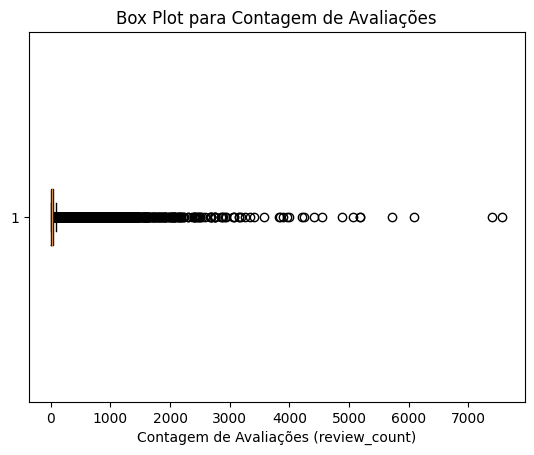

In [27]:
# Carregar o conjunto de dados
df = pd.read_json('/content/yelp_academic_dataset_business.json', lines=True)

# Criar um boxplot para a contagem de avaliações (review_count)
plt.boxplot(df['review_count'], vert=False)
plt.title('Box Plot para Contagem de Avaliações')
plt.xlabel('Contagem de Avaliações (review_count)')
plt.show()

## Correlação e Regressão
Correlação mede o grau de relação entre duas variáveis. A Correlação ajuda a entender se e como duas variáveis estão relacionadas. A variável dependente (representada no eixo Y) é a que está sendo estudada, enquanto as variáveis independentes (no eixo X) são usadas para explicar as variações na variável dependente. A correlação mede o grau de relação entre duas variáveis, ajudando a determinar como elas estão associadas, com a variável independente no eixo X.

Regressão é uma técnica para modelar a relação entre uma variável dependente e uma ou mais variáveis independentes.  Regressão é usada para prever ou modelar uma variável com base em outras variáveis.


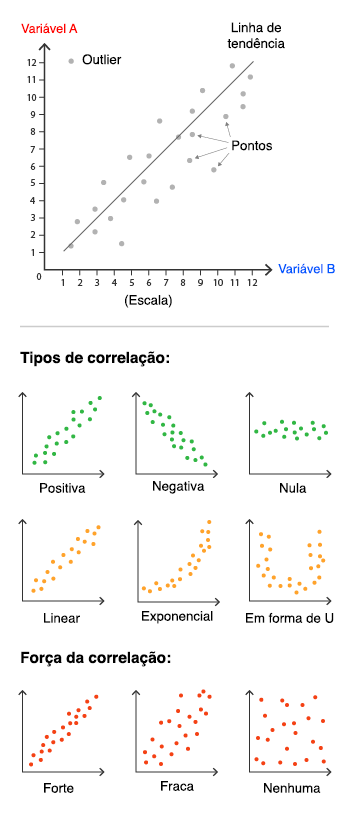


In [28]:
# Cálculo da correlação entre o número de avaliações (review_count) e a classificação (stars)
correlacao = business_df['review_count'].corr(business_df['stars'])
print(f'Correlação entre número de avaliações e classificação: {correlacao}')


Correlação entre número de avaliações e classificação: 0.06342031729274115


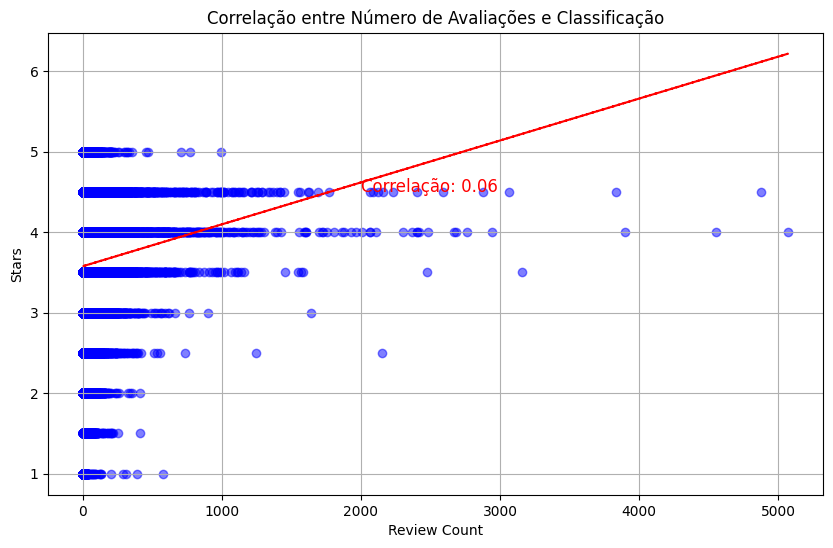

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Cálculo da correlação entre o número de avaliações e a classificação
correlacao = business_df['review_count'].corr(business_df['stars'])

# Cria um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(business_df['review_count'], business_df['stars'], color='blue', alpha=0.5)
plt.title('Correlação entre Número de Avaliações e Classificação')
plt.xlabel('Review Count')
plt.ylabel('Stars')
plt.text(2000, 4.5, f'Correlação: {correlacao:.2f}', fontsize=12, color='red')
plt.grid(True)

# Adiciona uma linha de tendência
z = np.polyfit(business_df['review_count'], business_df['stars'], 1)
p = np.poly1d(z)
plt.plot(business_df['review_count'], p(business_df['review_count']), "r--")

plt.show()


### Matriz de Correlacao

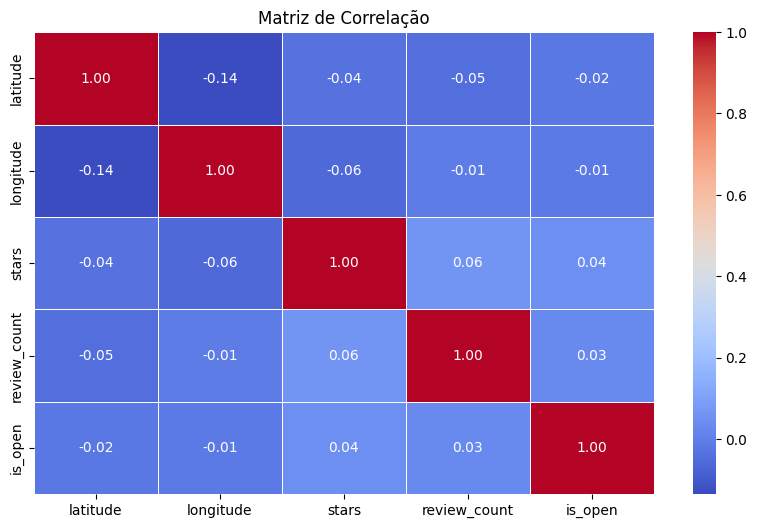

In [ ]:
correlation_matrix = business_df[['latitude', 'longitude', 'stars', 'review_count', 'is_open']].corr()

# Plot da matriz de correlação
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


### Matriz de dispersão

In [31]:
import altair as alt
import pandas as pd

# Lista de todas as colunas do DataFrame que você deseja incluir na matriz de dispersão
columns = ['latitude', 'longitude', 'stars', 'review_count', 'is_open']

# Crie um novo DataFrame apenas com as colunas selecionadas
scatter_data = business_df[columns]

# Configure um limite mais alto para o número máximo de linhas
alt.data_transformers.enable('default', max_rows=None)

# Crie um gráfico de dispersão usando Altair
scatter_chart = alt.Chart(scatter_data).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='is_open:N'  # Use 'is_open' para codificar cores
).properties(
    width=150,
    height=150
).repeat(
    row=['latitude', 'longitude', 'stars', 'review_count', 'is_open'],
    column=['latitude', 'longitude', 'stars', 'review_count', 'is_open']
)

# Exiba o gráfico
scatter_chart


alt.RepeatChart(...)

### Exercício 10 ⏰:
Use o ChatGPT para:

1. Descrever e interpretar o resultados do segundo gráfico (matriz de correlacao)
2. Descrever e interpretar o resultados do terceiro gráfico (matriz de dispersão)

# Seção 4: Processamento do Texto

Na quarta seção, discutiremos o pré-processamento de texto, um passo crucial no processamento de dados de texto. Vamos explorar técnicas para preparar o texto dos comentários e análises contidas no dataset.

1. Selecionar as 30 primeiras linhas do dataset review.json
2. Contagem de frequência de palavras (totais e únicas)
3. Contagem de frequência de classes de palavras
4. Visualização de frequência de palavras
5. Visualização de frequência de classes das palavras
6. Reconhecimento de Entidades Nomeadas (NER)
7. Co-ocorrência de palavras (bigrama Nome/Adjetivo)
8. Rede de co-ocorrência
9. Gráfico de nuvem de palavras (sem stopwords)
10. Análise de sentimentos
11. Análise de emoções
12. Análise de tópicos para identificar os principais temas abordados
13. Relacionar pelo menos uma variável quantitativa e qualitativa



OBS: atenção aos conceitos de tokenização, stopwords, part of speech (POS)


# Primeiras 30 linhas

In [ ]:

# Selecionando as primeiras 30 linhas
primeiras_30_linhas = review2_df.head(30)


In [ ]:
primeiras_30_linhas

review_id                 user_id             business_id  \
0   KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1   BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2   saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3   AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4   Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   
5   JrIxlS1TzJ-iCu79ul40cQ  eUta8W_HdHMXPzLBBZhL1A  04UD14gamNjLY0IDYVhHJg   
6   6AxgBCNX_PNTOxmbRSwcKQ  r3zeYsv1XFBRA4dJpL78cw  gmjsEdUsKpj9Xxu6pdjH0g   
7   _ZeMknuYdlQcUqng_Im3yg  yfFzsLmaWF2d4Sr0UNbBgg  LHSTtnW3YHCeUkRDGyJOyw   
8   ZKvDG2sBvHVdF5oBNUOpAQ  wSTuiTk-sKNdcFyprzZAjg  B5XSoSG3SfvQGtKEGQ1tSQ   
9   pUycOfUwM8vqX7KjRRhUEA  59MxRhNVhU9MYndMkz0wtw  gebiRewfieSdtt17PTW6Zg   
10  rGQRf8UafX7OTlMNN19I8A  1WHRWwQmZOZDAhp2Qyny4g  uMvVYRgGNXf5boolA9HXTw   
11  l3Wk_mvAog6XANIuGQ9C7Q  ZbqSHbgCjzVAqaa7NKWn5A  EQ-TZ2eeD_E0BHuvoaeG5Q   
12  XW_LfMv0fV21l9c6xQd_lw  9OAtfnWag-ajVxRbUTGIyg  lj-E32x9_FA7GmUrBGBEWg   
13  8JFGBuHMoiNDyfcxuWNtrA  smOvOajNG0lS4Pq7d8g4JQ  RZtGWDLCAtuipwaZ-UfjmQ   
14  UBp0zWyH60Hmw6Fsasei7w  4Uh27DgGzsp6PqrH913giQ  otQS34_MymijPTdNBoBdCw   
15  OAhBYw8IQ6wlfw1owXWRWw  1C2lxzUo1Hyye4RFIXly3g  BVndHaLihEYbr76Z0CMEGw   
16  oyaMhzBSwfGgemSGuZCdwQ  Dd1jQj7S-BFGqRbApFzCFw  YtSqYv1Q_pOltsVPSx54SA   
17  LnGZB0fjfgeVDVz5IHuEVA  j2wlzrntrbKwyOcOiB3l3w  rBdG_23USc7DletfZ11xGA   
18  u2vzZaOqJ2feRshaaF1doQ  NDZvyYHTUWWu-kqgQzzDGQ  CLEWowfkj-wKYJlQDqT1aw   
19  Xs8Z8lmKkosqW5mw_sVAoA  IQsF3Rc6IgCzjVV9DE8KXg  eFvzHawVJofxSnD7TgbZtg   
20  vBK79c3_1Ff_oqkh5VpfGg  Ohhrhu1RkqfVciIVx_W5HQ  nRKndeZLQ3eDL10UMwS2rQ   
21  ZVvhc3Go7v5I8XTiVoWmqQ  WBpQDAZymU0dhIqXcACGNw  ut6fi2W2YaipNOqvi7e0jw   
22  J-4NdnDZ0pUQaUEEwDI9KQ  vrKkXsozqqecF3CW4cGaVQ  rjuWz_AD3WfXJc03AhIO_w   
23  eCiWBf1CJ0Zdv1uVarEhhw  OhECKhQEexFypOMY6kypRw  vC2qm1y3Au5czBtbhc-DNw   
24  lUUhg8ltDsUZ9h0xnwY4Dg  RreNy--tOmXMl1en0wiBOg  cPepkJeRMtHapc_b2Oe_dw   
25  qS6kE7CDoDagyPZwmueJaQ  zoBajEyVA0z4IjbFsMJksg  c-IgS6Pk6vMyax7Rbr38eA   
26  G_5UczbCBJriUAbxz3J7Tw  clWLI5OZP2ad25ugMVI8gg  x4XdNhp0Xn8lOivzc77J-g   
27  z0osLHDvXvzfm57D4DmD2Q  xVKE_HJ2pwUtTdLbL3pnCg  S2Ho8yLxhKAa26pBAm6rxA   
28  DyrAIuKl60j_X8Yrrv-kpg  mNsVyC9tQVYtzLOCbh2Piw  MWmXGQ98KbRo3vsS5nZhMA   
29  elqRpX9T3YwL07uLNtN3Bg  -sryo4gDYxbZ1T5Bz4l5Bw  ltBBYdNzkeKdCNPDAsxwAA   

    stars  useful  funny  cool  \
0     3.0       0      0     0   
1     5.0       1      0     1   
2     3.0       0      0     0   
3     5.0       1      0     1   
4     4.0       1      0     1   
5     1.0       1      2     1   
6     5.0       0      2     0   
7     5.0       2      0     0   
8     3.0       1      1     0   
9     3.0       0      0     0   
10    5.0       2      0     0   
11    4.0       0      0     0   
12    4.0       0      0     0   
13    4.0       0      0     0   
14    4.0       0      2     0   
15    5.0       0      0     0   
16    5.0       0      0     0   
17    4.0       1      0     0   
18    5.0       2      0     1   
19    5.0       0      0     0   
20    5.0       2      5     2   
21    3.0       0      0     0   
22    5.0       2      2     2   
23    4.0       0      0     0   
24    4.0       1      0     1   
25    4.0       0      0     0   
26    5.0       0      0     0   
27    3.0       0      0     0   
28    5.0       1      0     0   
29    2.0       0      0     0   

                                                 text                 date  
0   If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1   I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2   Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3   Wow!  Yummy, different,  delicious.   Our favo...  2015-01-04 00:01:03  
4   Cute interior and owner (?) gave us tour of up...  2017-01-14 20:54:15  
5   I am a long term frequent customer of this est...  2015-09-23 23:10:31  
6   